<a href="https://colab.research.google.com/github/tyleretheridge/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS14_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
# Create dataframe
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2698]
sales_data = {'sales': sales}
df = pd.DataFrame(sales_data)

# Calculate Mean
entries = len(sales)
sales_mean = df.sales.sum() / entries

# Calculate variance
df['sales_distance'] = df.sales - sales_mean
df['sales_distance_squared'] = df.sales_distance**2

sales_var = df.sales_distance_squared.sum()/(entries - 1)
sales_std = sales_var**(1/2)

# Print
print("Number of entries:", entries)
print("Sales Variance:", sales_var)
print("Sales Standard Deviation:", sales_std)

Number of entries: 7
Sales Variance: 213308.33333333334
Sales Standard Deviation: 461.85315126491594


In [0]:
def my_stats(data):
  """Calculates and returns variance and standard deviation.
  
  return data_var, data_std
  """
  
  # Calculate mean
  count = len(data)
  mean = np.sum(data) / count
  
  # Calculate Variance & Standard Deviation
  distance = data - mean
  distance_squared = distance**2
  data_var = np.sum(distance_squared)/(count - 1)
  data_std = data_var**(1/2)
  
  return data_var, data_std


In [9]:
my_stats(sales)

(213308.33333333334, 461.85315126491594)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [11]:
# Store data
customer = [127, 80, 105, 92, 120, 115, 93]

data_entries = {'sales': sales, 'customers': customer}
df2 = pd.DataFrame(data_entries)
df2.head()

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120


In [12]:
df_cov = df2.cov()
df_cov

,sales,customers
sales,213308.333333,7587.000000
customers,7587.000000,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [13]:
# Calculate variance and std
customer_var, customer_std = my_stats(customer)
sales_var, sales_std = my_stats(sales)

correlation_coefficient = df_cov / (customer_std * sales_std)
correlation_coefficient

,sales,customers
sales,27.076527,0.963064
customers,0.963064,0.036932


In [14]:
np.corrcoef(customer, sales)

array([[1.        , 0.96306415],
       [0.96306415, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [6]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', index_col=0)
print(titanic.shape)
titanic.head()

(1310, 15)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [5]:
# Calculate variance-covariance matrix 
titanic.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [7]:
titanic.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

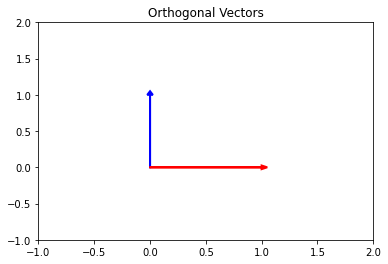

In [16]:
vec_a = [0,1]
vec_b = [1,0]

plt.arrow(0,0, vec_a[0], vec_a[1], linewidth=2, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, vec_b[0], vec_b[1], linewidth=2, head_width=.05, head_length=0.05, color ='red')
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.title("Orthogonal Vectors")
plt.show()

Orthogonal also means perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [17]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])
np.dot(a,b)


-40

These vectors are not orthogonal because the dot product of a and b does not equal 0. 

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [18]:
c = np.array([2, -15, 6, 20])
(np.linalg.norm(c))**2

665.0

In [19]:
np.dot(c,c)

665

In [20]:
np.dot(c,c.T)

665

They are all reduced to the same value

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = 2\hat{i} + 11\hat{j} + -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [21]:
f = np.array([4, 12, 11, 9, 2])
norm = np.linalg.norm(f)
f_hat = (1/norm)*f
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

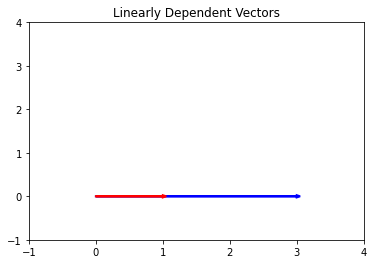

In [23]:
vec_c = [3,0]
vec_d = [1,0]

plt.arrow(0,0, vec_c[0], vec_c[1], linewidth=2, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, vec_d[0], vec_d[1], linewidth=2, head_width=.05, head_length=0.05, color ='red')
plt.xlim(-1,4)
plt.ylim(-1,4)
plt.title("Linearly Dependent Vectors")
plt.show()

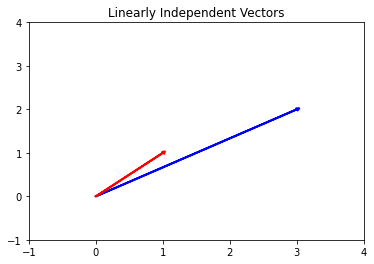

In [24]:
vec_e = [3,2]
vec_f = [1,1]

plt.arrow(0,0, vec_e[0], vec_e[1], linewidth=2, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, vec_f[0], vec_f[1], linewidth=2, head_width=.05, head_length=0.05, color ='red')
plt.xlim(-1,4)
plt.ylim(-1,4)
plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

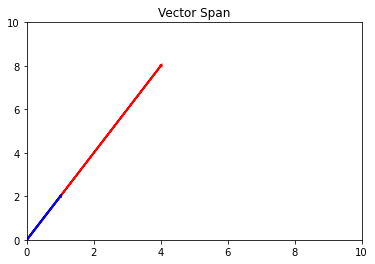

In [28]:
vec_g = [1,2]
vec_h = [4,8]

plt.arrow(0,0, vec_h[0], vec_h[1], linewidth=2, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vec_g[0], vec_g[1], linewidth=2, head_width=.05, head_length=0.05, color ='blue')

plt.xlim(0,10)
plt.ylim(0,10)
plt.title("Vector Span")
plt.show()

The span of g and h is the line y=2x

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
from mpl_toolkits.mplot3d import Axes3D
vec_l = np.array([1, 2, 3])
vec_m = np.array([-1, 0, 7])
vec_n = np.array([4, 8, 2])

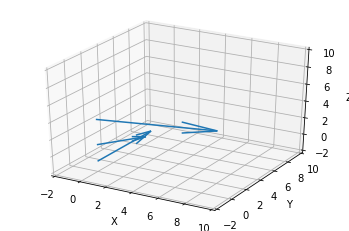

In [33]:
fig = plt.figure()
ax = fig.gca(projection='3d')
 
vectors = np.array([[0, 0, 1, 2, 3, 0],[0, 0, -1, 0, 7, 0],[0, 0, 4, 8, 2, 0]])

X, Y, Z, U, V, W = zip(*vectors)
ax.quiver(X, Y, Z, U, V, W, length=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim([-2,10])
ax.set_ylim([-2,10])
ax.set_zlim([-2,10])

plt.show()


The span of $\{l, m, n\}$ is $\mathbb{R}^3$

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



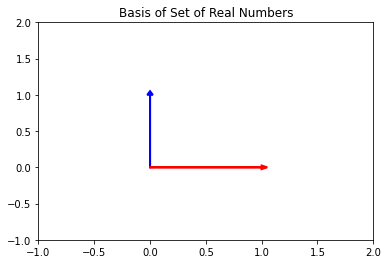

In [25]:
vec_a = [0,1]
vec_b = [1,0]

plt.arrow(0,0, vec_a[0], vec_a[1], linewidth=2, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, vec_b[0], vec_b[1], linewidth=2, head_width=.05, head_length=0.05, color ='red')
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.title("Basis of Set of Real Numbers")
plt.show()

## 6.2 What does it mean to form a basis?

Sets of vectors with linear combinations that allows those vectors to occupy any space within a space fom a basis.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

The rank is $\mathbb{R}^3$

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix conveys the span resulting from the vectors contained within.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()